<a href="https://colab.research.google.com/github/jorguzb/DataScienceScript/blob/master/NLP_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preparing to Train a Model**

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for graphs
# Modules for Model Evaluation
from sklearn.model_selection import train_test_split # for creating train and test datasets
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
### Modules for supervised ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

**Data used**
* source : Amazon.com (Macauley)
* comma-separated (,)

In [5]:
from google.colab import files 
uploaded = files.upload()

Saving Appliances_NLP.csv to Appliances_NLP.csv


In [6]:
import io 
df = pd.read_csv(io.BytesIO(uploaded["Appliances_NLP.csv"]), delimiter=",",  error_bad_lines=False)
df.head(10)

Unnamed: 0  ...         date
0       28443  ...  06 12, 2015
1      182203  ...  01 19, 2015
2      109096  ...  03 26, 2012
3      173338  ...  12 14, 2015
4       82124  ...  04 23, 2016
5       80862  ...  05 11, 2015
6      303488  ...  02 13, 2016
7      140214  ...  09 23, 2015
8      108215  ...  12 30, 2013
9      361480  ...   07 1, 2016

[10 rows x 8 columns]

In [ ]:
#from google.colab import drive
#drive.mount('drive')
#df_gourmet.to_csv('df_gourmet.csv')
#!cp df_gourmet.csv "drive/My Drive/"

In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'overall', 'reviewerID', 'asin', 'style',
       'review', 'date'],
      dtype='object')

In [ ]:
#How to extract years,months, ... from a date column
#import calendar, datetime
#df['Date'] = pd.to_datetime(df['date'])
#df['year'] = df['Date'].dt.year
#df['month'] = df['Date'].dt.month
#df['day'] = df['Date'].dt.day

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7000 non-null   int64  
 1   Unnamed: 0.1  7000 non-null   int64  
 2   overall       7000 non-null   float64
 3   reviewerID    7000 non-null   object 
 4   asin          7000 non-null   object 
 5   style         1557 non-null   object 
 6   review        7000 non-null   object 
 7   date          7000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 437.6+ KB


In [9]:
df.shape

(7000, 8)

In [10]:
df["reviewerID"].nunique()

6983

In [11]:
df[df['review'].str.contains("hate")]['review'].head(10).tolist()

["we bought a whirlpool fridge that came with a different filter (i think it was pur) and we hated it! the water trickled out so slowly it was almost a joke. but we assumed it was a default of the fridge, not the filter. when we decided we needed to change out the filter, amazon directed us to this everydrop filter, saying it was the new version that was recommended. i noticed in the product summary that it claimed to filter more water per minute than the pur. so we went ahead and got it and we couldn't be happier! we realized that the original slow water trickle was not the fridge, but the filter. this one gives a pretty steady flow; we aren't standing at the fridge forever now for a simple glass of water.\n\nthe water comes out kind of cloudy, from little bubbles in the filter process, but the cloudiness goes away within seconds. i was concerned the filter may not work as well, since it was filtering water faster, but a couple of people in the family actually get sore stomachs from u

In [ ]:
#df=df.sample(n=300)

# **EXPLORATORY DATA ANALYSIS**

We start by exploring the data. But, we need to clean it (preprocess) first.

## **DATA PREPROCESSING**

Eliminate null reviews

In [12]:
df.shape

(7000, 8)

In [13]:
#df = df[~df["review"].isnull()]
#df.shape

In [14]:
# Number of words/terms used in the reviews
# APPLY function -- len (number of letters and spaces )
df['review_len'] = df['review'].apply(len)
df[['review','review_len']].head(4)

review  review_len
0  works as expected.  not the best way to run a ...          83
1  first off, it's made in mexico. secondly, the ...         423
2  i ordered this because our humidifier was put ...         188
3  worked just like it was suppose to. it was a p...         202

In [ ]:
# the number of words -- it is that APPLY LAMBDA function
# count every word separated by ( )
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df[['review', 'word_count']].head()

In [ ]:
# The longest review
df['word_count'].max()

1793

In [16]:
df[df['word_count']==2003]["review"].tolist()

[]

In [17]:
# overall ==> 1 à 5
df[df['word_count']>200]["overall"].head()

9      5.0
21     3.0
60     5.0
136    4.0
165    5.0
Name: overall, dtype: float64

In [ ]:
# The shortest review
df['word_count'].min()

1

In [18]:
df[df["word_count"]==1]["review"].tolist()

['great',
 'great!',
 'gift',
 'happy',
 'good',
 'kskdjcjkdjdjxdj',
 'thanks',
 'great!',
 'perfect',
 'good',
 'a',
 'excellent',
 'awesome',
 'great',
 'coool',
 'great!',
 'awsome',
 'worked',
 'good',
 'good',
 'works',
 'good',
 'excellent',
 'great.',
 'great!',
 'awesome',
 'perfect',
 'great',
 'good',
 'good',
 'ok',
 'ok',
 'good.',
 'great!',
 'works',
 'good',
 'aaaaa+++++',
 'great!',
 'perfect',
 'good',
 'works',
 'good$',
 'good',
 'excellent!!!!!!!!!!',
 'great',
 'great',
 'exelent',
 'awesome!!!!',
 'good',
 'perfect!',
 'works',
 'ok,',
 'good',
 'great',
 'awesome',
 'awesome',
 'excellent',
 'perfect',
 'good',
 'works!!!!',
 'great',
 'perfect',
 'excellent',
 'like',
 'perfect',
 'thanks',
 'aaa',
 'a',
 'good',
 'thanks',
 'pricy!',
 'awesome...',
 'fit!',
 'aa++',
 'great',
 'aok',
 'home',
 'great',
 'awesome!!!',
 'great.',
 'good',
 'great',
 'great',
 'easy',
 'excellent',
 'perfect!',
 'nice',
 'great',
 'cool',
 'perfect!',
 'thathth',
 'great!',
 'repl

In [19]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'overall', 'reviewerID', 'asin', 'style',
       'review', 'date', 'review_len', 'word_count'],
      dtype='object')

In [ ]:
#df=df.drop(columns='CLASS')
#df=pd.merge(df2, df, left_index=True, right_index=True)
#df.head(10)

In [20]:
df["word_count"].describe()

count    7000.000000
mean       34.554857
std        64.247326
min         1.000000
25%         6.000000
50%        16.000000
75%        36.000000
max      1415.000000
Name: word_count, dtype: float64

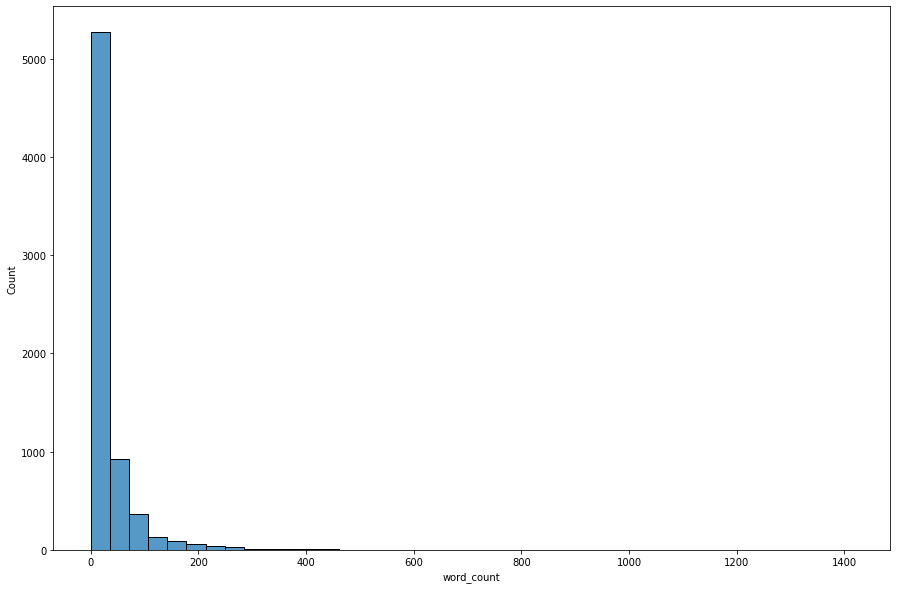

In [21]:
# Visualization
plt.figure(figsize=(15,10))
import seaborn as sns
sns.histplot(x="word_count", data=df, bins=40)
plt.show()

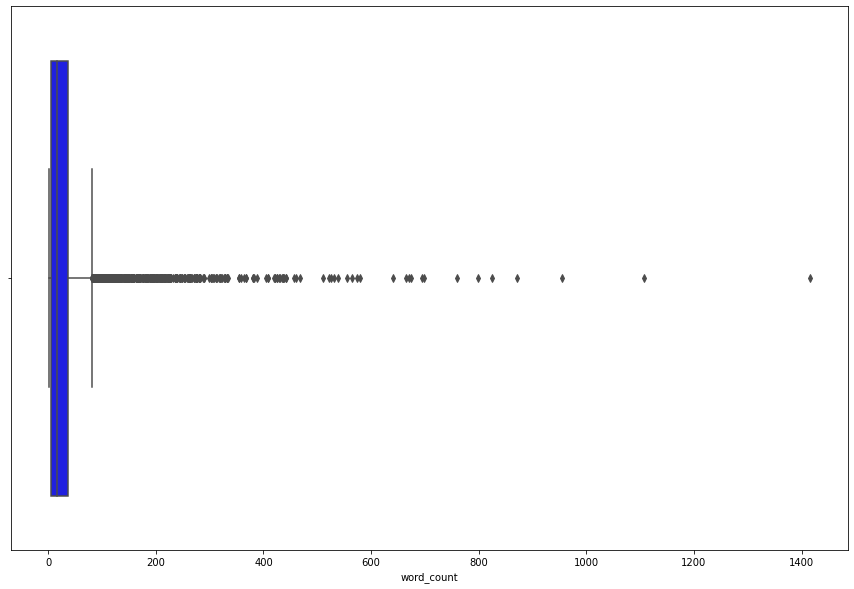

In [22]:
#Boxplot for word_count
plt.figure(figsize=(15,10))
sns.boxplot(x="word_count", data=df, color="b")
plt.show()

Does the number of words used in the reviews depend on consumer evaluation of the product? 
* create two groups of reviewers based on their 'overall' score (1 & 2: 0, 3, 4 & 5 : 1)
* bar chart comparing these 2 groups on word_count

In marketing, it is widely admitted that dissatisfied consumers "talk" more than satisfied consumers. Losses loom larger than gains (Khaneman and Tversky, 1979).

In [23]:
df["Group"]=(df["overall"]>2).astype(int)
df["Group"].value_counts()

1    6058
0     942
Name: Group, dtype: int64

In [24]:
df["Group"].replace({0: "Dissatisfied", 1:"Satisfied"}, inplace=True)
df["Group"].value_counts()

Satisfied       6058
Dissatisfied     942
Name: Group, dtype: int64

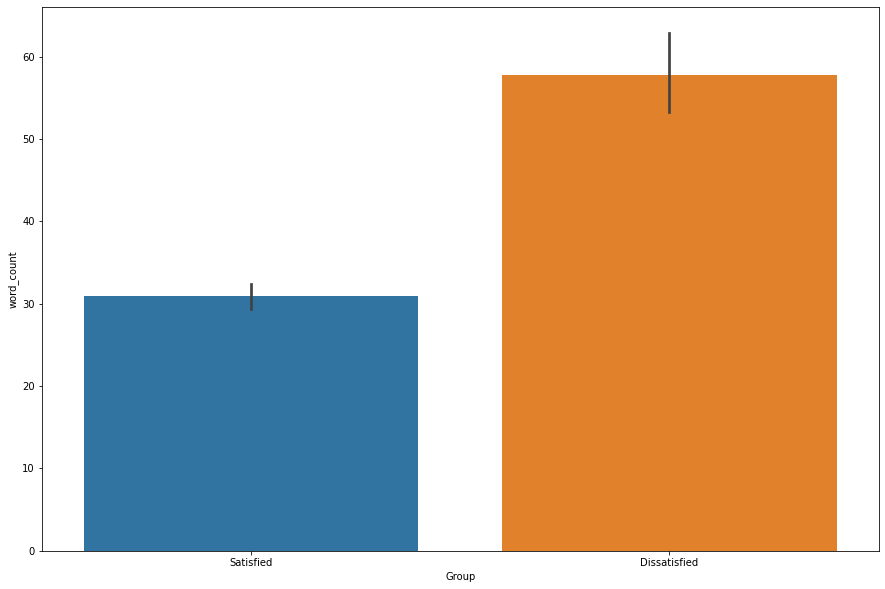

In [25]:
#Boxplot for word_count
plt.figure(figsize=(15,10))
sns.barplot(x="Group", y="word_count", data=df)
plt.show()

# **CLEAN THE DATA**

**Bag of words**
- nltk -> natural language toolkit
- sklearn -> CountVectorizer/TFIDFCountVectorizer

In [26]:
# important for data coming from tweeter
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ') 
    return ReviewText
# Apply
df['review'] = preprocess(df['review'])

In [27]:
df['review'].head(6)

0    works as expected.  not the best way to run a ...
1    first off, it's made in mexico. secondly, the ...
2    i ordered this because our humidifier was put ...
3    worked just like it was suppose to. it was a p...
4                                         worked great
5                                  good quality hoses.
Name: review, dtype: object

## VECTORIZE USING NLTK OR NATURAL LANGUAGE TOOLKIT

In [28]:
! pip install nltk

In [29]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
import string # for strings
import nltk #  NLTK
from nltk.corpus import stopwords # stopwords
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatization
from nltk.stem import PorterStemmer # Stemming
# lower() - 'GOOD' will be 'good'
df_sample=df.copy()
text = df_sample["review"].str.lower().str.cat(sep=' ')
text

'works as expected.  not the best way to run a waterline, but it will do in a pinch. first off, it\'s made in mexico. secondly, the knobs and knob skirts aren\'t really stainless steel. they\'re plastic with some cheap silver tape on them. if you\'re accustomed to opening your oven door to check your food, then this isn\'t the oven for you. you\'ll melt the knobs and knob skirts right off the oven like i did. it\'s a $180 a pop to replace them and the replacements they send you are also plastic.  buyer beware! i ordered this because our humidifier was put away so it got very dusty, so wheni finally needed to use it again it needed a new filter and it was not hard to install or find. works great. worked just like it was suppose to. it was a perfect fit for my fridge-air refrigerator. took out the broken one and this went right into its place. nothing else you could really ask for from this part. worked great good quality hoses. fits perfectly! perfect fit! i decided to purchase a better

In [32]:
# split into words by white space - tokenization
tokens = text.split()
tokens

['works',
 'as',
 'expected.',
 'not',
 'the',
 'best',
 'way',
 'to',
 'run',
 'a',
 'waterline,',
 'but',
 'it',
 'will',
 'do',
 'in',
 'a',
 'pinch.',
 'first',
 'off,',
 "it's",
 'made',
 'in',
 'mexico.',
 'secondly,',
 'the',
 'knobs',
 'and',
 'knob',
 'skirts',
 "aren't",
 'really',
 'stainless',
 'steel.',
 "they're",
 'plastic',
 'with',
 'some',
 'cheap',
 'silver',
 'tape',
 'on',
 'them.',
 'if',
 "you're",
 'accustomed',
 'to',
 'opening',
 'your',
 'oven',
 'door',
 'to',
 'check',
 'your',
 'food,',
 'then',
 'this',
 "isn't",
 'the',
 'oven',
 'for',
 'you.',
 "you'll",
 'melt',
 'the',
 'knobs',
 'and',
 'knob',
 'skirts',
 'right',
 'off',
 'the',
 'oven',
 'like',
 'i',
 'did.',
 "it's",
 'a',
 '$180',
 'a',
 'pop',
 'to',
 'replace',
 'them',
 'and',
 'the',
 'replacements',
 'they',
 'send',
 'you',
 'are',
 'also',
 'plastic.',
 'buyer',
 'beware!',
 'i',
 'ordered',
 'this',
 'because',
 'our',
 'humidifier',
 'was',
 'put',
 'away',
 'so',
 'it',
 'got',
 'ver

In [33]:
## call the stopwords
stopwds=stopwords.words('english')

In [34]:
# Select only those tokens which are not part of the stopwords
tokens= [token for token in tokens if token not in stopwds]

In [35]:
len(tokens)

129084

In [36]:
# Delete all tokens with less than 3 letters
tokens=[word for word in tokens if len(word)>=3]
len(tokens)

125601

In [37]:
# Exclude numbers and keep only text
tokens= [token for token in tokens if token.isalpha()]

In [38]:
#from nltk.stem import PorterStemmer
#stemmer=PorterStemmer()
#tokens=[stemmer.stem(word) for word in tokens]
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(word) for word in tokens]
tokens[6:15]

['knob',
 'knob',
 'skirt',
 'really',
 'stainless',
 'plastic',
 'cheap',
 'silver',
 'tape']

In [39]:
len(tokens)

95738

In [41]:
# Visualization
word_dist = nltk.FreqDist(tokens)
print (word_dist)

<FreqDist with 6936 samples and 95738 outcomes>


In [42]:
# most_common function in NLTK
top_N=20
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt

Word  Frequency
0      work       1493
1       one       1239
2       fit       1123
3     great       1106
4     water       1009
5    filter        943
6      good        794
7     would        762
8      like        749
9      part        736
10     easy        734
11  product        625
12      get        600
13     time        567
14   worked        552
15      ice        536
16      new        520
17  perfect        490
18      use        458
19    price        458

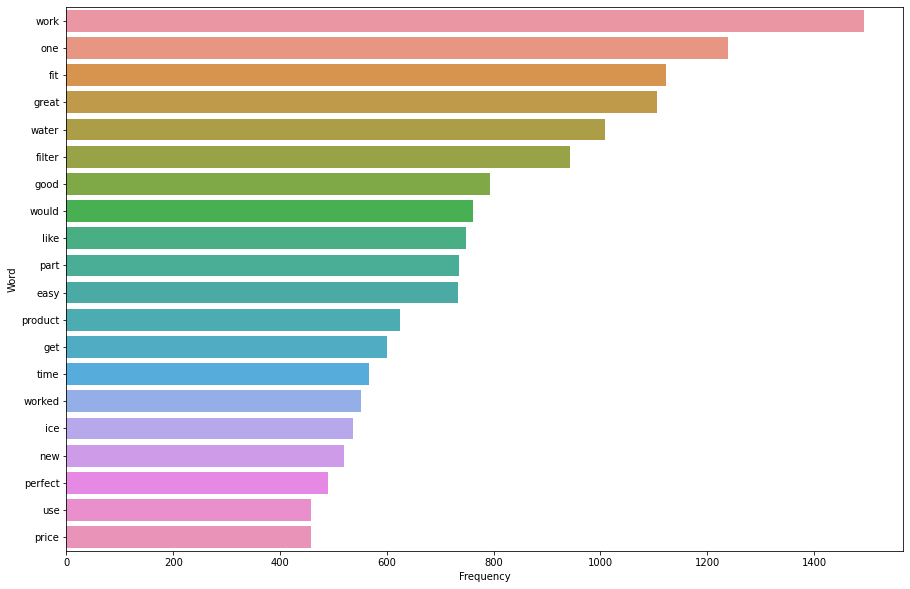

In [43]:
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=rslt)
plt.show()

### VECTORIZATION USING SKLEARN 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
#CountVectorizer - vectors of words and count
CountVectorizer()

CountVectorizer()

In [46]:
# Extract the vocabulary from our review column
vec= CountVectorizer(stop_words='english', lowercase=True)
training_input = vec.fit_transform(df_sample["review"])

In [ ]:
# This is a DTM - it shows the number of rows  & columns (tokens extracted)
training_input.shape

(87097, 32226)

In [ ]:
feature_names = vec.get_feature_names()
feature_names

['00',
 '000',
 '000mg',
 '002',
 '00a',
 '00am',
 '00gr',
 '00pm',
 '01',
 '01xqgtfgtms',
 '02',
 '020',
 '02062015',
 '02857mcz8mn1bxe84nss',
 '03',
 '039',
 '03oz',
 '04',
 '040mg',
 '05',
 '0518ww',
 '06',
 '07',
 '0704',
 '07112014',
 '07632',
 '07840',
 '08',
 '080mg',
 '0815',
 '09',
 '097',
 '0988',
 '0__1',
 '0g',
 '0k',
 '0mg',
 '0ne',
 '0pened',
 '0z',
 '10',
 '100',
 '1000',
 '1000mg',
 '100c',
 '100ct',
 '100g',
 '100gr',
 '100grams',
 '100lbs',
 '100mg',
 '100s',
 '100th',
 '100x',
 '101',
 '1010',
 '1016',
 '1019',
 '102',
 '103',
 '104',
 '1048',
 '105',
 '1054',
 '1059193',
 '105f',
 '105o',
 '106',
 '108',
 '10am',
 '10c',
 '10cal',
 '10cent',
 '10g',
 '10lb',
 '10lbs',
 '10mg',
 '10min',
 '10oz',
 '10pm',
 '10s',
 '10stars',
 '10th',
 '10x',
 '10x7in',
 '11',
 '110',
 '1100mg',
 '1100w',
 '110f',
 '110mg',
 '111',
 '112oz',
 '113',
 '1130',
 '113601',
 '114',
 '1144',
 '115',
 '115lbs',
 '115mg',
 '115o',
 '117',
 '117f',
 '118',
 '119',
 '11g',
 '11grams',
 '11oz',


### CUSTOMIZE OUR DATA PREPROCESSING

In [ ]:
import re
def my_preprocessor(text):
        text=text.lower() 
        #text=re.sub("\\W"," ",text) # remove special chars
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','aaa','aaaa','aaaaa','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=3]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
# Use it in our CountVectorizer
# Unigrams
vec = CountVectorizer(ngram_range=(1, 1), preprocessor=my_preprocessor)
bag_of_words = vec.fit_transform(df_sample["review"])

In [ ]:
bag_of_words.shape

(87097, 23191)

In [ ]:
feature_names = vec.get_feature_names()
feature_names[3]

'aand'

In [ ]:
# calculate the total of each word
sum_words = bag_of_words.sum(axis=0) 
sum_words

matrix([[1, 2, 1, ..., 1, 3, 1]], dtype=int64)

In [ ]:
sum_words.shape

(1, 23191)

In [ ]:
sum_words[0, 0]

1

In [ ]:
vec.vocabulary_.items()

dict_items([('box', 2198), ('arrived', 1022), ('crushed', 4711), ('put', 16030), ('away', 1315), ('found', 8044), ('bag', 1389), ('open', 14044), ('tiny', 20831), ('place', 15124), ('ant', 800), ('got', 8800), ('using', 21852), ('french', 8138), ('market', 12313), ('coffee', 3746), ('price', 15647), ('amazon', 638), ('lowest', 11992), ('best', 1758), ('need', 13402), ('use', 21840), ('one', 14005), ('third', 20657), ('amount', 686), ('regular', 16660), ('grind', 9009), ('taste', 20296), ('superb', 19858), ('secret', 17891), ('probably', 15711), ('would', 22865), ('recommend', 16479), ('connie', 4118), ('tea', 20365), ('tasty', 20320), ('husband', 9938), ('drink', 6167), ('favorite', 7455), ('brand', 2244), ('make', 12171), ('perfect', 14805), ('great', 8955), ('making', 12177), ('daishi', 4874), ('stock', 19477), ('kombu', 11265), ('love', 11968), ('thing', 20643), ('really', 16350), ('well', 22493), ('packaged', 14398), ('day', 4960), ('earlier', 6315), ('like', 11690), ('biscotti', 1

In [ ]:
# or every (Word and index) you will find in the vocabulary, show boith the Word and the Count
# Calculate the sum from the first index (0) to the last one (idx)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq

[('box', 2849),
 ('arrived', 1207),
 ('crushed', 153),
 ('put', 2803),
 ('away', 796),
 ('found', 2971),
 ('bag', 5028),
 ('open', 880),
 ('tiny', 475),
 ('place', 690),
 ('ant', 9),
 ('got', 2550),
 ('using', 2955),
 ('french', 712),
 ('market', 336),
 ('coffee', 11782),
 ('price', 5818),
 ('amazon', 2563),
 ('lowest', 57),
 ('best', 6304),
 ('need', 3278),
 ('use', 10406),
 ('one', 11461),
 ('third', 230),
 ('amount', 1767),
 ('regular', 2319),
 ('grind', 466),
 ('taste', 18978),
 ('superb', 70),
 ('secret', 67),
 ('probably', 1527),
 ('would', 7658),
 ('recommend', 2525),
 ('connie', 1),
 ('tea', 8402),
 ('tasty', 2051),
 ('husband', 1535),
 ('drink', 4079),
 ('favorite', 3893),
 ('brand', 4530),
 ('make', 9351),
 ('perfect', 2638),
 ('great', 19440),
 ('making', 1719),
 ('daishi', 2),
 ('stock', 308),
 ('kombu', 5),
 ('love', 17857),
 ('thing', 2429),
 ('really', 8445),
 ('well', 3493),
 ('packaged', 572),
 ('day', 2211),
 ('earlier', 48),
 ('like', 21939),
 ('biscotti', 12),
 ('wa

In [ ]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('like', 21939),
 ('good', 20180),
 ('great', 19440),
 ('taste', 18978),
 ('love', 17857),
 ('flavor', 11788),
 ('coffee', 11782),
 ('one', 11461),
 ('use', 10406),
 ('make', 9351),
 ('really', 8445),
 ('product', 8429),
 ('tea', 8402),
 ('get', 7713),
 ('would', 7658),
 ('buy', 6742),
 ('much', 6651),
 ('best', 6304),
 ('little', 6194),
 ('price', 5818),
 ('also', 5422),
 ('coconut', 5297),
 ('time', 5041),
 ('bag', 5028),
 ('cup', 4986),
 ('better', 4897),
 ('nice', 4790),
 ('add', 4667),
 ('used', 4663),
 ('even', 4594),
 ('brand', 4530),
 ('tried', 4447),
 ('chocolate', 4126),
 ('drink', 4079),
 ('find', 4031),
 ('sugar', 3973),
 ('eat', 3948),
 ('try', 3913),
 ('favorite', 3893),
 ('bit', 3788),
 ('water', 3730),
 ('lot', 3675),
 ('bought', 3580),
 ('many', 3562),
 ('well', 3493),
 ('oil', 3418),
 ('keep', 3370),
 ('need', 3278),
 ('always', 3251),
 ('way', 3235),
 ('fresh', 3219),
 ('work', 3208),
 ('think', 3194),
 ('sweet', 3169),
 ('quality', 3153),
 ('first', 3133),
 ('made'

In [ ]:
rslt = pd.DataFrame(words_freq,
                    columns=['Word', 'Frequency'])
print(rslt)

             Word  Frequency
0            like      21939
1            good      20180
2           great      19440
3           taste      18978
4            love      17857
...           ...        ...
23186   patrolium          1
23187  mayonaises          1
23188         jap          1
23189      squire          1
23190      tarbox          1

[23191 rows x 2 columns]


In [ ]:
rslt.set_index('Word', inplace=True)
rslt

Frequency
Word                 
like            21939
good            20180
great           19440
taste           18978
love            17857
...               ...
patrolium           1
mayonaises          1
jap                 1
squire              1
tarbox              1

[23191 rows x 1 columns]

### USE OF A FUNCTION

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top words after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    vec = CountVectorizer(ngram_range=(1, 1), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_sample['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Unig = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])
df_Unig.head()

Word  Frequency
0   like      21939
1   good      20180
2  great      19440
3  taste      18978
4   love      17857

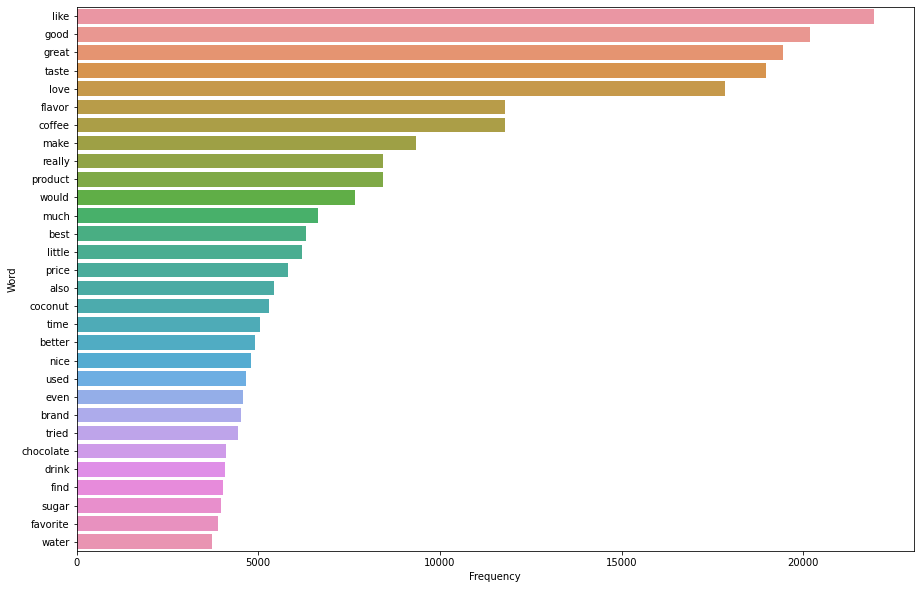

In [ ]:
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Unig)
plt.show()

**Bigrams**

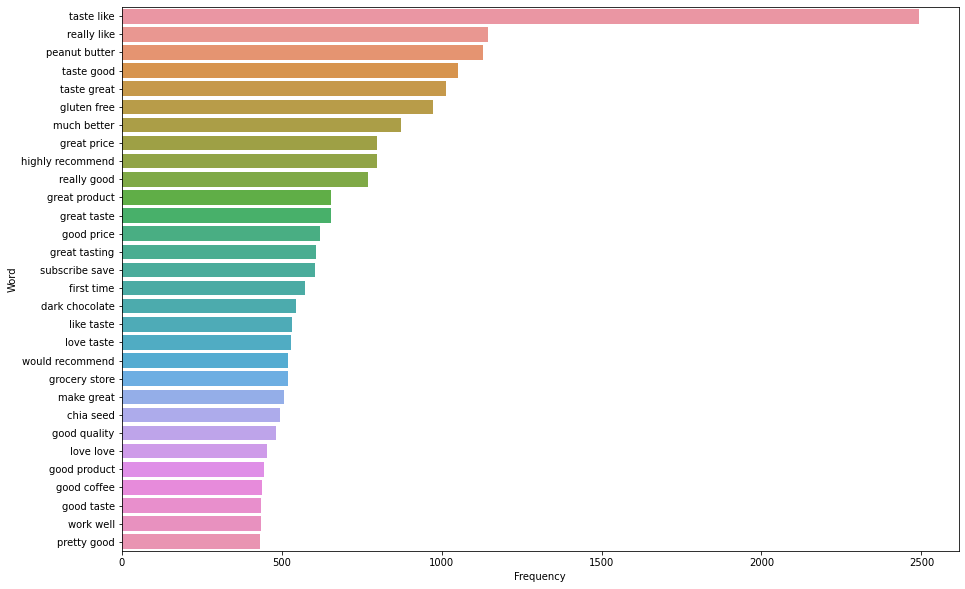

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    # I define the bigrams in countvectorizer
    vec = CountVectorizer(ngram_range=(2, 2), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_sample['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Big = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])

plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Big)
plt.show()

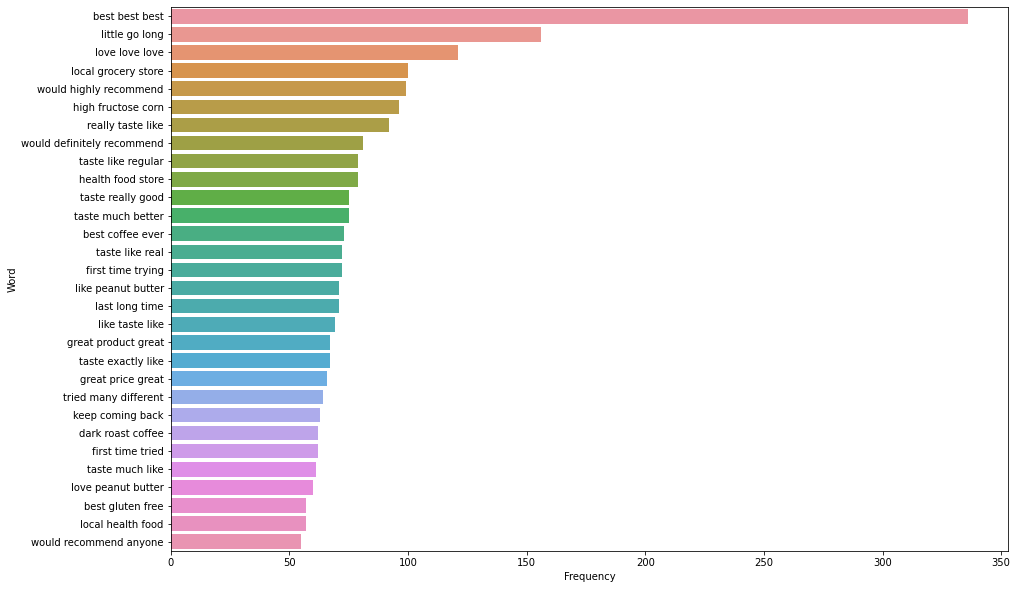

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top trigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    # I define the trigrams in countvectorizer
    vec = CountVectorizer(ngram_range=(3, 3), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_sample['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Trig = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])

plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Trig)
plt.show()

## TFIDF

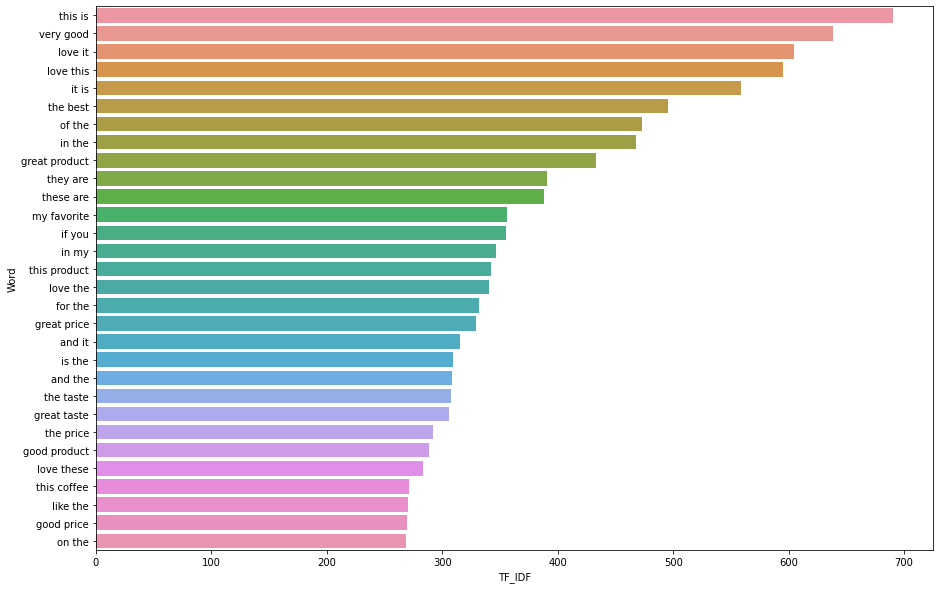

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using text cleaned in the previous steps
#  TFIDFVectorizer
vect = TfidfVectorizer(ngram_range=(2,2))
tfidf_matrix = vect.fit_transform(df_sample["review"])
tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel().tolist()
# Make a dataframe with 2 columns : words that i get from
# vect.get_feature_names () and tfidf scores that i turn in capital letters
df5 = pd.DataFrame({'Word': vect.get_feature_names(), 'TF_IDF': tfidf_scores})
# Show only the top 20
df5=df5.sort_values(by='TF_IDF', ascending=False).head(30)
# Visualization
color = plt.cm.gist_earth(np.linspace(0, 1, 25))
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="TF_IDF", y="Word", data=df5, orient="h")
plt.show()

In [ ]:
xxx

In [ ]:
!python -m pip install wordcloud

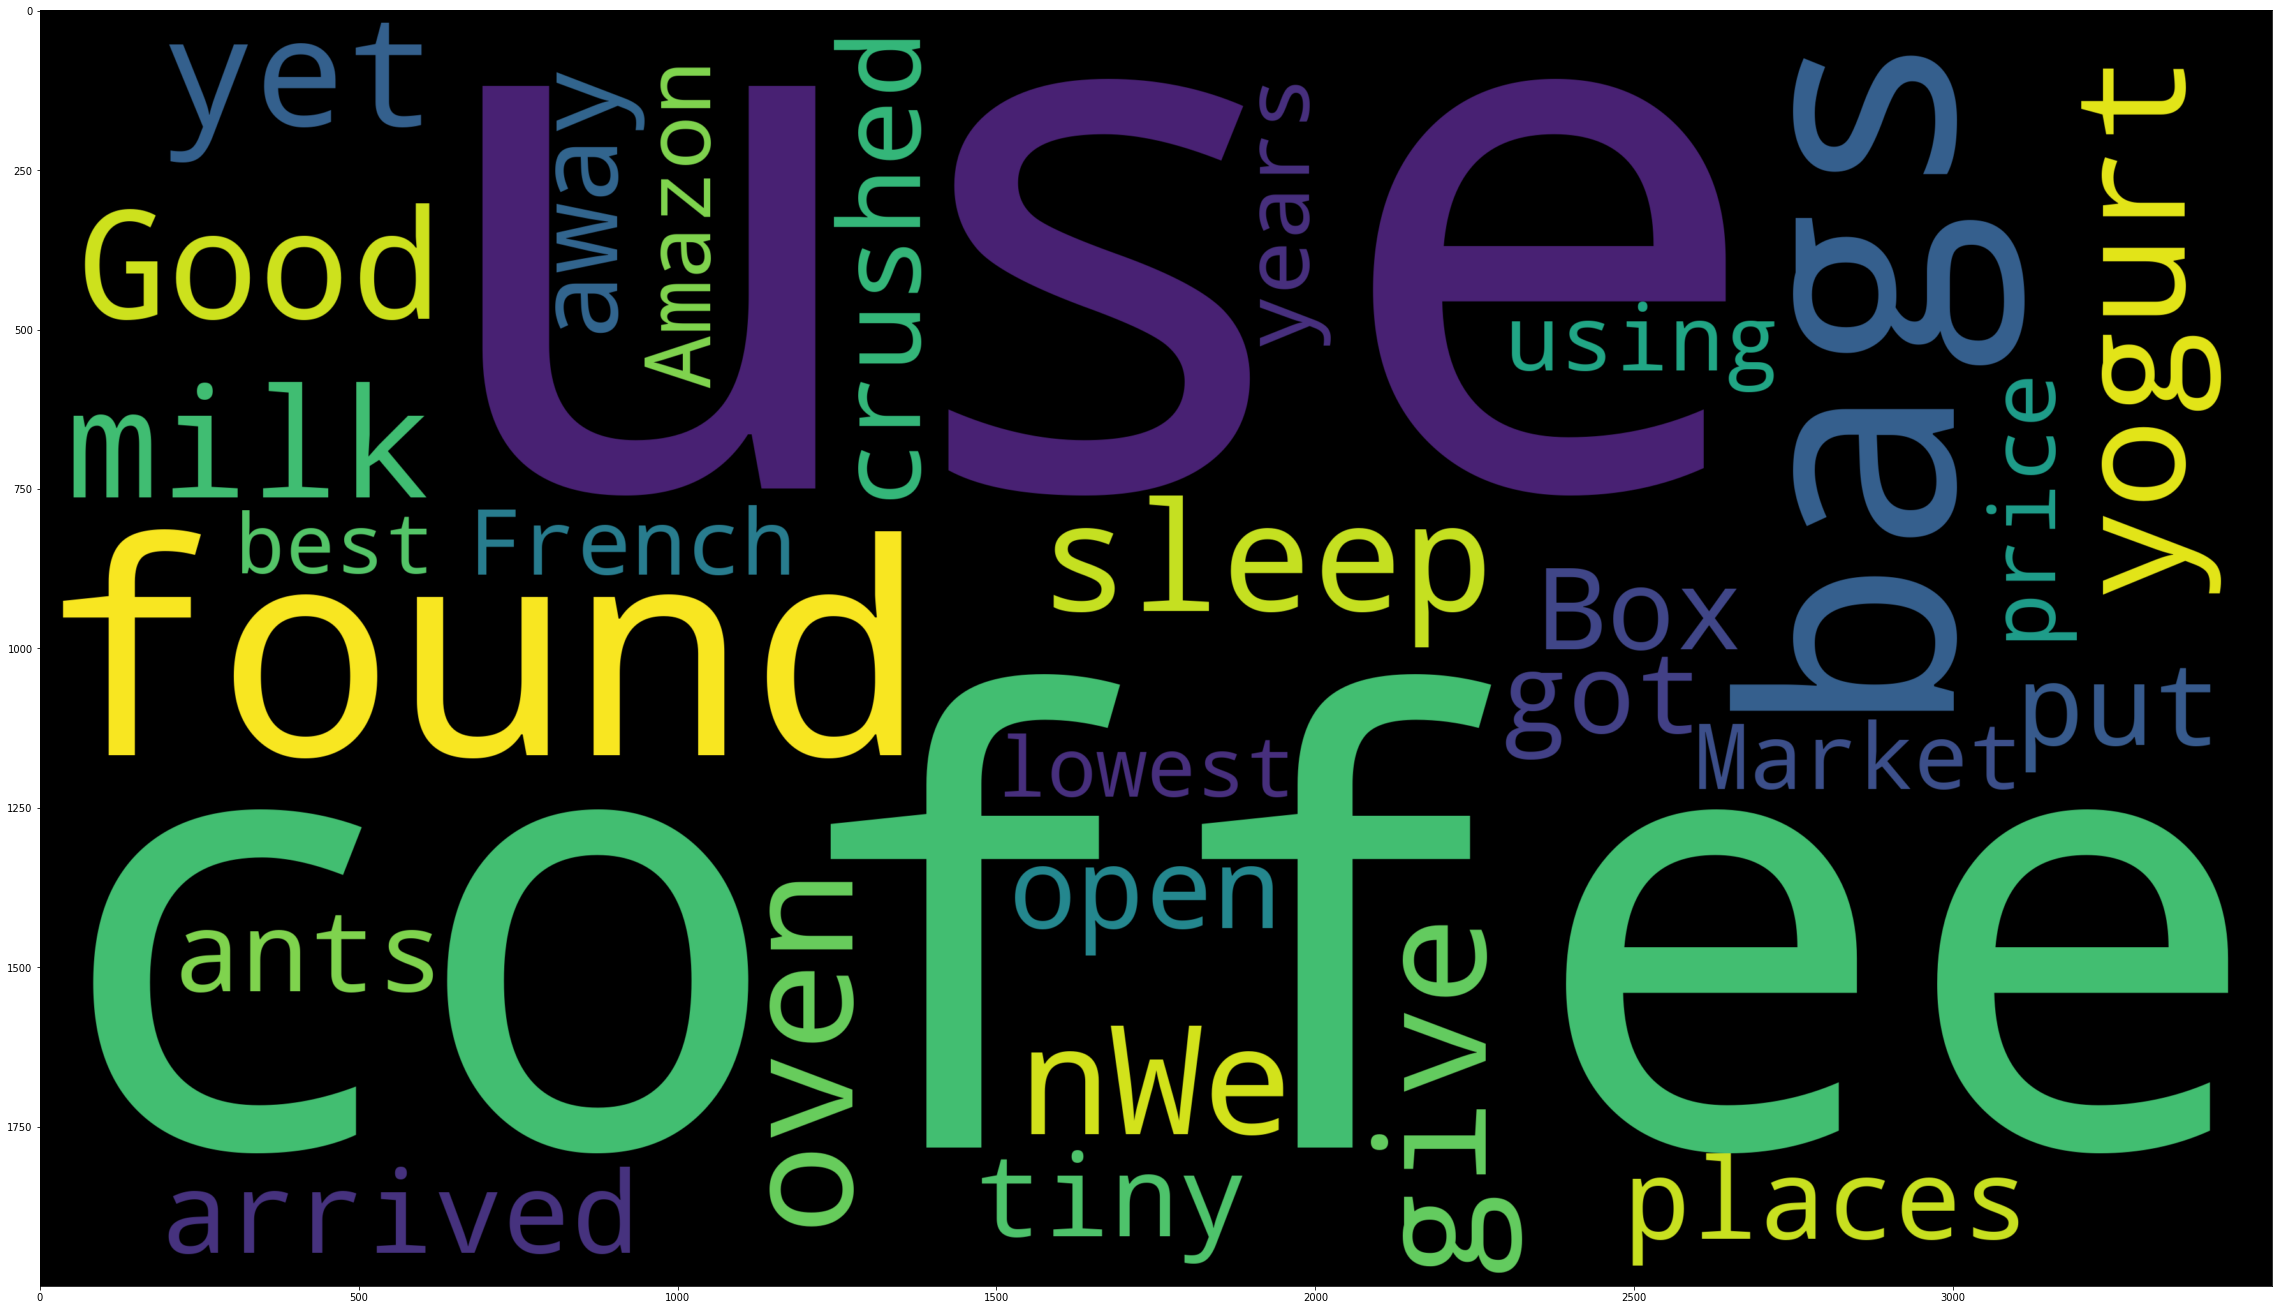

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Word cloud
text = df_sample['review'].values
# Generate the words
wordcloud = WordCloud(
    width = 3500,
    height = 2000, max_words=30,
    background_color="black",
    stopwords = STOPWORDS).generate(str(text))

# Graph
fig = plt.figure(
    figsize = (40, 30))
# Show
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
xxx

# TOPIC MODELING

In [ ]:
!pip install -U gensim

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models, similarities, downloader

#### En français
from nltk.tag import StanfordPOSTagger
jar = 'C:/Users/m.ferhat/Desktop/stanford-postagger-full-2016-10-31/stanford-postagger-3.7.0.jar'
model = 'C:/Users/m.ferhat/Desktop/stanford-postagger-full-2016-10-31/models/french.tagger'
import os
java_path = "C:/Program Files/Java/jdk1.8.0_121/bin/java.exe"
os.environ['JAVAHOME'] = java_path
pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8' )
res = pos_tagger.tag('je suis libre'.split())
print (res)

- Avant la modélisation, nous convertissons le texte prétraité en un sac de mots (bag of words) - que vous pouvez considérer comme un repertoire (dictionary) où la clé est le mot et la valeur le nombre de fois que ce mot apparaît dans l'ensemble du corpus.



## TOUTES LES VARIABLES

In [ ]:
from nltk.corpus import stopwords
text = df["TEXT"].astype(str).str.lower().str.cat(sep=' ')
text=text.split()
text= [token for token in text if token.isalpha()]
text= [token for token in text if token not in ('!','that','&','.',':')]
stop_words = stopwords.words('english')
stop_words.extend(['france', 'cdg', 'air','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
text= [word for word in text if word not in stop_words]
#porter_stemmer=PorterStemmer()
#text=[porter_stemmer.stem(word=word) for word in words]
text=[word for word in text if len(word)>2]
# lemmatization
lemmatizer = WordNetLemmatizer()
text=[lemmatizer.lemmatize(word) for word in text]
text_list =  [i.split() for i in text]
text_list

In [ ]:
dictionary = corpora.Dictionary(text_list)

In [ ]:
len(dictionary)

- Maintenant, pour chaque document prétraité, nous utilisons l'objet dictionary qui vient d'être créé pour convertir ce document en un sac de mots. C'est-à-dire que pour chaque document, nous créons un dictionary (repertoire) indiquant combien de mots et combien de fois ces mots apparaissent.

In [ ]:
#  document-term matrix
DTM = [dictionary.doc2bow(text) for text in text_list]
# DTM = Document x Term Matrix (Matrice commentaires x Mots)

In [ ]:
import gensim
from gensim import models
from gensim.test.utils import common_corpus, common_dictionary
from gensim import corpora
### identification de 5 thématiques
ldamodel = gensim.models.ldamodel.LdaModel(DTM, num_topics=4, 
                                           id2word = dictionary, 
                                           passes=20, random_state=37)
## Je demande 5 thématiques (topics)
## Gensim va itérer 20 fois (explorer la meilleure configuration)
import pprint
pprint.pprint(ldamodel.top_topics(DTM,topn=10))
# imprimer les 5 topics avec 10 mots les plus importants

In [ ]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, 
                              corpus=DTM, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
#from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=ldamodel, texts=text_list, 
                    dictionary=dictionary, coherence='c_v')

coherence = cm.get_coherence()  # get coherence value
print(round(coherence, 2))

- Attention : la cohérence en soi ne veut rien dire. Il faut comparer les "cohérences" de plusieurs configurations (*plusieurs modèles avec un nombre de topics différent*) 

In [ ]:
def compute_coherence_values(dictionary, 
                             corpus, 
                             texts, 
                             limit, 
                             start, 
                             step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
    with respective number of topics
    """
    # On définit la variable cohérence_values - elle va enregistrer des scores
    coherence_values = []
    # On crée une variable model_list qui affichera les modèles LDA
    model_list = []
    for num_topics in range(start, limit, step):
        ldamodel=gensim.models.ldamodel.LdaModel(corpus=DTM, id2word=dictionary, num_topics=num_topics)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel, 
                                        texts=text_list, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=DTM, 
                                                        texts=text_list, 
                                                        start=2, 
                                                        limit=15, 
                                                        step=1)

In [ ]:
# Show graph
import matplotlib.pyplot as plt
# spécifier les valeurs commencer avec start=2 (2 topics) 
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel_2 = gensim.models.ldamodel.LdaModel(DTM, 
                                             num_topics=2, 
                                             id2word = dictionary, 
                                             passes=20,
                                            random_state=34)

In [ ]:
topics = ldamodel_2.print_topics(num_words=5)
for topic in topics:
    print(topic)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_2, 
                              corpus=DTM, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
#from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
cm_2 = CoherenceModel(model=ldamodel_2, texts=text_list, dictionary=dictionary, coherence='c_v')
## NB: coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional)
## Coherence measure to be used. Fastest method - ‘u_mass’, ‘c_uci’ also known as c_pmi. 
# For ‘u_mass’ corpus should be provided, if texts is provided, 
# it will be converted to corpus using the dictionary. 
# For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided (corpus isn’t needed)
coherence_2 = cm_2.get_coherence()  # get coherence value
print(round(coherence_2, 2))

#### - Quel est le thème dominant et sa contribution en pourcentage dans chaque document
#### - Dans les modèles LDA, chaque document est composé de plusieurs thématiques. Mais, en général, un seul des sujets est dominant. 
#### - Le code ci-dessous extrait ce thème dominant pour chaque phrase et indique le poids du thème et des mots clés dans une sortie bien formatée.

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=DTM, texts=df):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel_2[DTM]):
        row = row_list[0] if ldamodel_2.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel_2.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
   # Add original text to the end of the output
    contents = pd.Series(text_list)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel_2, corpus=DTM, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

- La phrase la plus représentative pour chaque sujet
- Parfois, vous souhaitez obtenir des exemples de phrases qui représentent le mieux un sujet donné. 
- Ce code permet d'obtenir la phrase la plus exemplaire pour chaque sujet.

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
df["TEXT"].head()

In [ ]:
!pip install pyLDavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_2, 
                              corpus=DTM, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
### ASTUCEZ REDUIRE AUX NOMS ET ADJECTIFS

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_2.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


### Topic Modeling — Attempt 2 (Nouns and Adjectives only): 
- In this step, only nouns and adjectives will be used for creating topics by using the LDA method. 
- Our purpose is to find hidden patterns in reviews. Now, we are just trying to explore 
   by using different criteria.

In [ ]:
import string
from nltk import word_tokenize, pos_tag
text = df["TEXT"].astype(str).str.lower().str.cat(sep=' ')
text=re.sub("\\W"," ",text) # remove special chars
words=re.split("\\s+",text)
text= [token for token in text if token.isalpha()]
text= [token for token in text if token not in ('!','that','&','.',':')]
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
text= [word for word in text if word not in stop_words]
#porter_stemmer=PorterStemmer()
#text=[porter_stemmer.stem(word=word) for word in words]
text=[word for word in words if len(word)>=2]
#'''Given a string of text,  pull out only the nouns and adjectives.'''
is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
#is_noun = lambda pos: pos[:2] == 'NN'
text = [word for (word, pos) in pos_tag(text) if is_noun_adj(pos)]
# lemmatization
lemmatizer = WordNetLemmatizer()
text=[lemmatizer.lemmatize(word) for word in text]
text_list =  [i.split() for i in text]
text_list

In [ ]:
dictionary = corpora.Dictionary(text_list)
#  document-term matrix
DTM = [dictionary.doc2bow(text) for text in text_list]
# DTM = Document x Term Matrix (Matrice commentaires x Mots)

In [ ]:
def compute_coherence_values(dictionary, 
                             corpus, 
                             texts, 
                             limit, 
                             start, 
                             step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
    with respective number of topics
    """
    # On définit la variable cohérence_values - elle va enregistrer des scores
    coherence_values = []
    # On crée une variable model_list qui affichera les modèles LDA
    model_list = []
    for num_topics in range(start, limit, step):
        ldamodel=gensim.models.ldamodel.LdaModel(corpus=DTM, id2word=dictionary, num_topics=num_topics)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel, 
                                        texts=text_list, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=DTM, 
                                                        texts=text_list, 
                                                        start=2, 
                                                        limit=15, 
                                                        step=1)

In [ ]:
# Show graph
import matplotlib.pyplot as plt
# spécifier les valeurs commencer avec start=2 (2 topics) 
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel_Noun_Adj = gensim.models.ldamodel.LdaModel(DTM, 
                                             num_topics=2, 
                                             id2word = dictionary, 
                                             passes=20,
                                            random_state=34)

topics = ldamodel_Noun_Adj.print_topics(num_words=5)
for topic in topics:
    print(topic)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_Noun_Adj, 
                              corpus=DTM, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_2.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


**get_term_topics**
- The function get_term_topics returns the odds of that particular word belonging to a particular topic.

In [ ]:
ldamodel_2.get_term_topics('food')

**Topic Modeling — Attempt 2 (Nouns and Adjectives only):**
- In this step, only nouns and adjectives will be used for creating topics by using the LDA method. 
- Our purpose is to find hidden patterns in reviews. Now, we are just trying to explore 
   by using different criteria.

In [ ]:
import string
from nltk import word_tokenize, pos_tag
text = df["TEXT"].astype(str).str.lower().str.cat(sep=' ')
text=re.sub("\\W"," ",text) # remove special chars
words=re.split("\\s+",text)
text= [token for token in text if token.isalpha()]
text= [token for token in text if token not in ('!','that','&','.',':')]
stop_words = stopwords.words('english')
stop_words.extend(['france', 'cdg', 'air','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
text= [word for word in text if word not in stop_words]
#porter_stemmer=PorterStemmer()
#text=[porter_stemmer.stem(word=word) for word in words]
text=[word for word in words if len(word)>=4]
#'''Given a string of text,  pull out only the nouns and adjectives.'''
is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
#is_noun = lambda pos: pos[:2] == 'NN'
text = [word for (word, pos) in pos_tag(text) if is_noun_adj(pos)]
# lemmatization
lemmatizer = WordNetLemmatizer()
text=[lemmatizer.lemmatize(word) for word in text]
text_list =  [i.split() for i in text]

# Construction du vocabulaire et de la matrice DTM
dictionary = corpora.Dictionary(text_list)
#  document-term matrix
DTM = [dictionary.doc2bow(text) for text in text_list]
# DTM = Document x Term Matrix (Matrice commentaires x Mots)

### ESTIMATION DU MODELE LDA
ldamodel = gensim.models.ldamodel.LdaModel(DTM, 
                                           num_topics=10, 
                                           id2word = dictionary, 
                                           passes=20, 
                                            #minimum_probability=0.03
                                           random_state=37)

In [ ]:
def compute_coherence_values(dictionary, 
                             corpus, 
                             texts, 
                             limit, 
                             start, 
                             step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
    with respective number of topics
    """
    # On définit la variable cohérence_values - elle va enregistrer des scores
    coherence_values = []
    # On crée une variable model_list qui affichera les modèles LDA
    model_list = []
    for num_topics in range(start, limit, step):
        ldamodel=gensim.models.ldamodel.LdaModel(corpus=DTM, id2word=dictionary, num_topics=num_topics)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel, 
                                        texts=text_list, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=DTM, 
                                                        texts=text_list, 
                                                        start=2, 
                                                        limit=15, 
                                                        step=1)

# Show graph
import matplotlib.pyplot as plt
# spécifier les valeurs commencer avec start=2 (2 topics) 
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**Estimation du modèle après choix du nombre de topics**

In [ ]:
ldamodel_2 = gensim.models.ldamodel.LdaModel(DTM, 
                                             num_topics=2, 
                                             id2word = dictionary, 
                                             passes=20,
                                            random_state=34)
import pprint
#pprint.pprint(ldamodel_2.top_topics(corpus,topn=5))

topics = ldamodel_2.print_topics(num_words=5)
for topic in topics:
    print(topic)

**Représentation graphique**

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_2, 
                              corpus=DTM, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

### REINJECTER LES TOPICS DANS LE FICHIER DE DEPART

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=DTM, texts=df):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel_Noun_Adj[DTM]):
        row = row_list[0] if ldamodel_Noun_Adj.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel_Noun_Adj.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,2), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
   # Add original text to the end of the output
   ### THE ORIGINAL DATASET IS DF["TEXT"]
    contents = pd.Series(df.TEXT)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel_Noun_Adj, corpus=DTM, texts=df)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(20)

In [ ]:
df_dominant_topic.shape

### REPRESENTATION GRAPHIQUE

- T-SNE : L’algorithme de réduction de dimensionnalité appelé t-distributed stochastic neighbor embedding (t-SNE) est un algorithme d’apprentissage non supervisé. Développé par Laurens van der Maaten et Geoffrey Hinton, il permet d’analyser des données décrites dans des espaces à forte dimensionnalité (via un grand nombre de descripteurs) pour les représenter dans des espaces à deux ou trois dimensions. Cet algorithme est très utilisé car il facilite la visualisation de données ayant beaucoup de descripteurs.
-
- T-SNE est un algorithme non-linéaire de “feature extraction” qui construit une nouvelle représentation des données de telle sorte que les données proches dans l’espace original aient une probabilité élevée d’avoir des coordonnnées proches dans le nouvel espace. A l’inverse, les données qui sont éloignées dans l’espace original, ont une probabilité faible d’avoir des représentations proches dans le nouvel espace. En pratique la similarité entre chaque paire de données, dans les deux espaces, est mesurée par le biais de calculs probabilistes basés sur des hypothèses de distribution. Et les nouvelles représentations se construisent de telle sorte à minimiser1 la différence2 entre les distributions de probabilités mesurées dans l’espace original et celles du nouvel espace.

In [ ]:
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

In [ ]:
!pip install TSNE

In [ ]:
from sklearn.manifold import TSNE
# LDA, tSNE
from sklearn.manifold import TSNE
#Refactoring results of LDA into numpy matrix (number_of_papers x number_of_topics).
hm = np.array([[y for (x,y) in ldamodel_Noun_Adj[DTM[i]]] for i in range(len(DTM))])
mtsne = TSNE(random_state=2017, perplexity=30, early_exaggeration=120)
embedding = mtsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)
embedding.columns = ['TSNE1', 'TSNE2', 'topic']

In [ ]:
embedding

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="topic", palette="deep", data=embedding,
               sizes=(20, 200), legend="full")

### SENTIMENT ANALYSIS

***Lexicon-based (rules, dictiinaries)***

TextBlob is a Python library for processing textual data. 
- It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, **sentiment analysis**, and more.

The sentiment property returns a namedtuple of the form Sentiment (polarity, subjectivity). 
- The polarity score is a float within the range [-1.0, 1.0].
  - where 0 indicates neutral, 
  - +1 indicates a very positive sentiment and 
  -  -1 represents a very negative sentiment.
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
  - Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

### AFINN
- The AFINN lexicon is a list of English terms manually rated for valence with an integer between -5 (negative) and +5 (positive) by Finn Årup Nielsen between 2009 and 2011.
- The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word.

In [ ]:
!pip install Afinn

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for Afinn: filename=afinn-0.1-cp36-none-any.whl size=53451 sha256=e8a0967a7c8676a8c72dc18327d6a1f645037da245f37287f1aacfb0cd2d1093
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn


In [ ]:
from afinn import Afinn
#afinn = Afinn(language='en')

In [ ]:
# Sentiment analysis AFINN
afinn=Afinn()
afinn_scores = [afinn.score(text) for text in df.review]
df['afinn'] = afinn_scores
df[['afinn', 'review']].head(10)

afinn                                             review
0   -2.0  Box arrived crushed and after I put it away I ...
1    8.0  Have been using French Market coffee for years...
2    0.0            Tea is tasty but the bags are too thin.
3    0.0               Husband will only drink this coffee!
4    5.0   My favorite brand of pectin, makes perfect jams.
5    3.0  Great for making Daishi stock with the Kombu s...
6    1.0                                  Just as promised!
7   16.0  I love coffee and the best thing with coffee i...
8    2.0                      I don't like the after taste.
9    2.0                      Found my new favorite coffee!

In [ ]:
df['afinn'].max()

1008.0

In [ ]:
!pip install vader

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for sonopy: filename=sonopy-0.1.2-cp36-none-any.whl size=2881 sha256=17b422bd82c34079f407b158afe3388dc74cfa22075a09694391727254e9ddf9
  Stored in directory: /root/.cache/pip/wheels/b6/39/ba/b2f21d4fbcb362658c73f83c9502782300b0399aef3693b506
Successfully built sonopy


positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05


In [ ]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
df_sample["sentiments_Vader"] = df_sample["review"].apply(lambda x: sid.polarity_scores(x))

In [ ]:
df_sample["sentiments_Vader"].head()

0    {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...
1    {'neg': 0.117, 'neu': 0.688, 'pos': 0.195, 'co...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp...
Name: sentiments_Vader, dtype: object

In [ ]:
df_sample = pd.concat([df_sample.drop(['sentiments_Vader'], axis=1), df_sample['sentiments_Vader'].apply(pd.Series)], axis=1)

In [ ]:
df_sample [["review", "compound"]].head()

review  compound
0  Box arrived crushed and after I put it away I ...   -0.4215
1  Have been using French Market coffee for years...    0.7184
2            Tea is tasty but the bags are too thin.    0.0000
3               Husband will only drink this coffee!    0.0000
4   My favorite brand of pectin, makes perfect jams.    0.7717

In [ ]:
!pip install TextBlob

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
Noun = lambda x: TextBlob(x).noun_phrases
df_sample['polarity'] = df_sample['review'].apply(pol)
df_sample['subjectivity'] = df_sample['review'].apply(sub)
df_sample['Noun'] = df_sample['review'].apply(Noun)
df_sample[["review", "polarity", "subjectivity", "Noun"]].head(10)

review  ...                                               Noun
0  Box arrived crushed and after I put it away I ...  ...                                      [tiny places]
1  Have been using French Market coffee for years...  ...  [have, market, amazon, regular grind coffee, c...
2            Tea is tasty but the bags are too thin.  ...                                              [tea]
3               Husband will only drink this coffee!  ...                                          [husband]
4   My favorite brand of pectin, makes perfect jams.  ...                     [favorite brand, perfect jams]
5  Great for making Daishi stock with the Kombu s...  ...                                    [daishi, kombu]
6                                  Just as promised!  ...                                                 []
7  I love coffee and the best thing with coffee i...  ...         [biscotti, biscotti, local cafe, 's worth]
8                      I don't like the after taste.  ...                                                 []
9                      Found my new favorite coffee!  ...                       [found, new favorite coffee]

[10 rows x 4 columns]

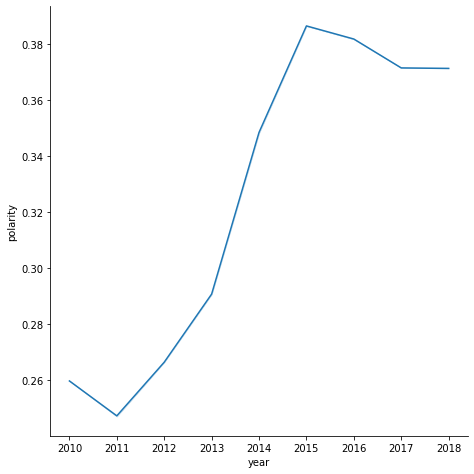

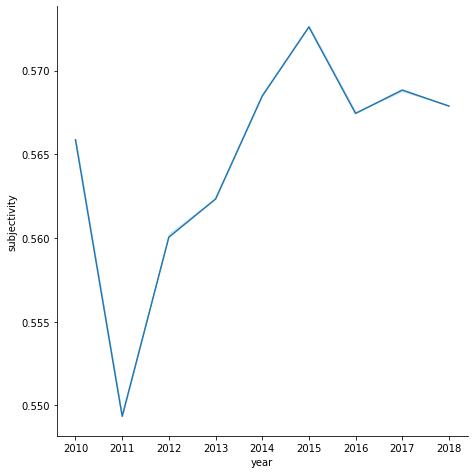

In [ ]:
import seaborn as sns
sns.relplot(x="year", y='polarity', data=df_sample, kind="line", height=6.5, aspect=1, ci=False)
sns.relplot(x="year", y='subjectivity', data=df_sample, kind="line", height=6.5, aspect=1, ci=False)

In [ ]:
df_sample[df_sample["polarity"]==-1]["review"].head(5)

875     "monkfruit" is sort of a misnomer. It's erythr...
1054                Colored water with sweetener.  Awful.
1374                             This water tastes awful.
1953    Terrible burnt taste. Put them out for the bir...
2641                 This stuff was nasty... gave it away
Name: review, dtype: object

In [ ]:
import plotly.express as px
fig = px.histogram(df_sample, nbins=16, x="polarity")
fig.show()

In [ ]:
df_sample["Number_Words"]=(df_sample.word_count>38).astype(int)
df_sample["Number_Words"].replace({0:"Less talkative", 1:"Talkative"}, inplace=True)
df_sample["Number_Words"].value_counts()

Less talkative    60770
Talkative         26327
Name: Number_Words, dtype: int64

In [ ]:
# Is there a difference in sentiment between talkative and non-talkative?
#!pip install statsmodels
import statsmodels.api as sm
import statsmodels.api
from statsmodels.formula.api import ols
formule=ols('polarity~Number_Words',data=df_sample).fit()
aov_table = statsmodels.stats.anova.anova_lm(formule, typ=2)
print(aov_table)

                   sum_sq       df            F  PR(>F)
Number_Words   631.533237      1.0  7110.997838     0.0
Residual      7734.974548  87095.0          NaN     NaN


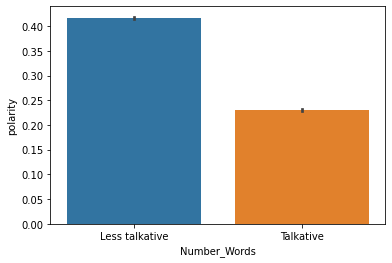

In [ ]:
import seaborn as sns
sns.barplot(x="Number_Words", y="polarity", data=df_sample)
plt.show()

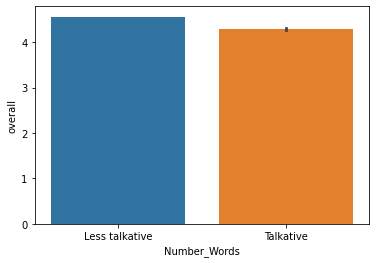

In [ ]:

import seaborn as sns
sns.barplot(x="Number_Words", y="overall", data=df_sample)
plt.show()

In [ ]:
# Is there a difference in sentiment between talkative and non-talkative?
#!pip install statsmodels
import statsmodels.api as sm
import statsmodels.api
from statsmodels.formula.api import ols
formule=ols('overall~Number_Words',data=df_sample).fit()
aov_table = statsmodels.stats.anova.anova_lm(formule, typ=2)
print(aov_table)

                    sum_sq       df            F         PR(>F)
Number_Words   1272.276430      1.0  1210.981853  1.633046e-263
Residual      91503.365969  87095.0          NaN            NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['compound'], df['CLASS'])
mc_results = mc.tukeyhsd()
print(mc_results)

In [ ]:
sns.barplot(x="CLASS", y="compound", data=df)
plt.show()

In [ ]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
round(df["afinn"].corr(df["compound"]), 3)

In [ ]:
#TRANSFORMER EN VARIABLE TEMPORELLE
#import calendar, datetime
#df['Date'] = pd.to_datetime(df['date'])
#df['year'] = df['Date'].dt.year
#df['month'] = df['Date'].dt.month
#df['day'] = df['Date'].dt.day

In [ ]:
!pip install nrclex

In [ ]:
 from nrclex import NRCLex
#Instantiate text object (for best results, 'text' should be unicode).
text_object = NRCLex("I am very dissatisfied and my company will not pay")
#Return words list.
text_object.words
#Return sentences list.
text_object.sentences
#Return affect list.
text_object.affect_list
#Return affect dictionary.
a=text_object.affect_dict
a
#Return raw emotional counts.

**ML BASED SENTIMENT ANALYSIS**

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io 
df_App = pd.read_csv(io.BytesIO(uploaded['Appliances_NLP.csv']), encoding='latin-1', sep=",")
df_App.head(10)

In [ ]:
df_App.columns

In [ ]:
df_App.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','style'], inplace=True)
df_App.shape

In [ ]:
df_App.drop_duplicates(subset=['reviewerID', "date", "review"], inplace=True)
df_App.shape

In [ ]:
df_App.dtypes

In [ ]:
#TRANSFORMER EN VARIABLE TEMPORELLE
import calendar, datetime
df_App['date'] = pd.to_datetime(df_App['date'])
df_App.dtypes

In [ ]:
df_App['year'] = df_App['date'].dt.year
df_App['month'] = df_App['date'].dt.month
df_App['day'] = df_App['date'].dt.day

**Analyse descriptive**

 **- les mots les plus utilisés**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    vec = CountVectorizer(ngram_range=(1, 1), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Application sur le fichier APPLIANCE.CSV
common_words = get_top_n_bigram(df_App['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Unigrammes = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])
# Représentation graphique
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Unigrammes)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    vec = CountVectorizer(ngram_range=(2, 2), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Application sur le fichier APPLIANCE.CSV
common_words = get_top_n_bigram(df_App['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Bigrammes = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])
# Représentation graphique
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Bigrammes)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    vec = CountVectorizer(ngram_range=(3, 3), preprocessor=my_preprocessor)
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Application sur le fichier APPLIANCE.CSV
common_words = get_top_n_bigram(df_App['review'], 30)
#for word, freq in common_words:
#    print(word, freq)
df_Trigrammes = pd.DataFrame(common_words, columns = ['Word' , 'Frequency'])
# Représentation graphique
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="Frequency", y="Word", data=df_Trigrammes)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(text, n=None):
    def my_preprocessor(text):
        text=text.lower() 
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','&','.',':', 'thus', 'therefore')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        text=[word for word in text if len(word)>=4]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
    # Nous appelons le TFIDFVectorizer
    vect_Tfidf = TfidfVectorizer(ngram_range=(2, 2), preprocessor=my_preprocessor)
    bag_of_words = vect_Tfidf.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect_Tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_App['review'], 30)
df_TFIDF = pd.DataFrame(common_words, columns = ['Word' , 'TF_IDF'])
# Représentation graphique
plt.figure(figsize=(15,10))
import seaborn as sns
sns.barplot(x="TF_IDF", y="Word", data=df_TFIDF)
plt.show()

In [ ]:
#Analyse lexicale du sentiment à partir de TextBlob
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
Noun = lambda x: TextBlob(x).noun_phrases
df_App['polarity'] = df_App['review'].apply(pol)
df_App['subjectivity'] = df_App['review'].apply(sub)
df_App['Noun'] = df_App['review'].apply(Noun)
df_App.head(10)

In [ ]:
df_App.date.head()

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="polarity",  data=df_App[df_App["year"]>=2012], ci=None)
#sns.lineplot(x="year", y="overall",  data=df_App, ci=None)
plt.show()

In [ ]:
## comparaison entre classes
#!pip install statsmodels
import statsmodels.api as sm
import statsmodels.api
from statsmodels.formula.api import ols
# Existe-t-il une différence statistiquement significative
# entre les années ?
formule=ols('polarity~year',data=df_App[df_App['year']>=2012]).fit()
aov_table = statsmodels.stats.anova.anova_lm(formule, typ=2)
print(aov_table)

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_App[df_App['year']>=2012]['polarity'], df_App[df_App['year']>=2012]['year'])
mc_results = mc.tukeyhsd()
print(mc_results)

In [ ]:
df_App["year"].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="polarity", data=df_App)
plt.show()

In [ ]:
sns.histplot(data=df_App, x="polarity", bins=10)

In [ ]:
# création de la variable dépendante
df_App['sentiment'] = (df_App.overall>3).astype(int)
df_App.head()

In [ ]:
df_App.columns

In [ ]:
df_App['sentiment'].value_counts()

I had created a target variable called Brand_love = 1 means the consumer expresses the love for the brand and 0 otherwise
Since the target was created from text data itself, I need to exclude the terms that I used to create this target variable.

In [ ]:
list_love="i love this|i love it|love|delighted|i love this|i love|love this|love it|adorable|awesome|loving|amazed|amazing|enjoy|adore|wonderful|cheerful|joyful|awsome|gorgeous|sexy|lovely|enjoying|favorite|amazed|passionate"

for c in list_love:
    df_sample['review'] = df_sample['review'].replace("") 
   # for c in list_hate:
   #     df_final['review'] = df_final['review'].replace("")
df_sample['review'] = df_sample['review'].str.replace('\n','')

In [ ]:
X = df_sample.review
y = df_sample.Brand_Love

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# examine the object shapes
print(X_train.shape)
print(X_test.shape)

(60967,)
(26130,)


In [ ]:
# use CountVectorizer to create document-term matrices from X_train and X_test
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
# fit and transform X_train. 
X_train_dtm = vect.fit_transform(X_train)

In [ ]:
X_train_dtm.shape

(60967, 29728)

In [ ]:
#  transform X_test. 
# to have the same vocabulary I just transform
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(26130, 29728)

In [ ]:
# examine the first 50 features
print(vect.get_feature_names()[50:])

In [ ]:
# examine the last 50 features
print(vect.get_feature_names()[-50:])

In [ ]:
# play with CountVectorizer

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# train the model using X_train_dtm 
model=nb.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
%precision %.2f
metrics.accuracy_score(y_test, y_pred_class)

0.86

In [ ]:
print (metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     19483
         1.0       0.72      0.71      0.72      6647

    accuracy                           0.86     26130
   macro avg       0.81      0.81      0.81     26130
weighted avg       0.86      0.86      0.86     26130



In [ ]:
# AIRE SOUS LA COURBE
from sklearn.metrics import roc_curve, auc
y_pred_prob =model.predict_proba(X_test_dtm)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(round(roc_auc, 3))

0.866


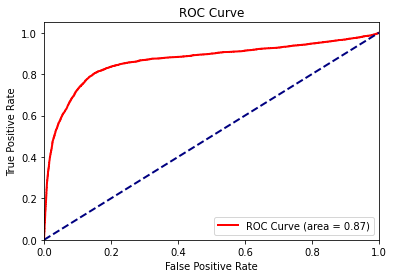

In [ ]:
# COURBE
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**dans une fonction**

In [ ]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print (metrics.classification_report(y_test, y_pred_class))

In [ ]:
# NOW LET US USE THE FUNCTION TO TEST FOR DIFFERENT CHANGES IN THE PARAMETERS
# use the default parameters
vect = CountVectorizer()
tokenize_test(vect)

Features:  29728
Accuracy:  0.8567164179104477
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     19483
         1.0       0.72      0.71      0.72      6647

    accuracy                           0.86     26130
   macro avg       0.81      0.81      0.81     26130
weighted avg       0.86      0.86      0.86     26130



In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  508686
Accuracy:  0.856142365097589
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     19483
         1.0       0.76      0.64      0.69      6647

    accuracy                           0.86     26130
   macro avg       0.82      0.78      0.80     26130
weighted avg       0.85      0.86      0.85     26130



In [ ]:
# exclude stopwords
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  29425
Accuracy:  0.861308840413318
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     19483
         1.0       0.74      0.70      0.72      6647

    accuracy                           0.86     26130
   macro avg       0.82      0.81      0.81     26130
weighted avg       0.86      0.86      0.86     26130



In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)
tokenize_test(vect)

Features:  29726
Accuracy:  0.8564485265977804
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     19483
         1.0       0.72      0.71      0.72      6647

    accuracy                           0.86     26130
   macro avg       0.81      0.81      0.81     26130
weighted avg       0.86      0.86      0.86     26130



In [ ]:
# only keep the top 1000 most frequent terms
vect = CountVectorizer(max_features=1000)
tokenize_test(vect)

Features:  1000
Accuracy:  0.8689246077305779
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     19483
         1.0       0.75      0.73      0.74      6647

    accuracy                           0.87     26130
   macro avg       0.83      0.82      0.83     26130
weighted avg       0.87      0.87      0.87     26130



In [ ]:
# only keep terms that appear in at least 5 documents
vect = CountVectorizer( max_features=2000, ngram_range=(1, 2))
tokenize_test(vect)

Features:  2000
Accuracy:  0.8621507845388442
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     19483
         1.0       0.71      0.77      0.74      6647

    accuracy                           0.86     26130
   macro avg       0.82      0.83      0.82     26130
weighted avg       0.87      0.86      0.86     26130



In [ ]:
# include ONLY 2-grams, and only keep terms that appear in at least 2 documents
vect = CountVectorizer(ngram_range=(2, 2), min_df=2)
tokenize_test(vect)

Features:  153514
Accuracy:  0.855683122847302
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     19483
         1.0       0.72      0.70      0.71      6647

    accuracy                           0.86     26130
   macro avg       0.81      0.81      0.81     26130
weighted avg       0.85      0.86      0.86     26130



In [ ]:
# AIRE SOUS LA COURBE
from sklearn.metrics import roc_curve, auc
y_pred_prob =nb.predict_proba(X_test_dtm)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(round(roc_auc, 3))
# COURBE
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# include ONLY 2-grams, and only keep terms that appear in at least 5 documents
vect = CountVectorizer(ngram_range=(2, 2))
tokenize_test(vect)

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=2)
tokenize_test(vect)

In [ ]:
# TF-IDF

In [ ]:
# TfidfVectorizer (CountVectorizer + TfidfTransformer)
from sklearn.feature_extraction.text import TfidfVectorizer
vect_Tfidf = TfidfVectorizer()

In [ ]:
### Using TF-IDF for classification ###
# use TfidfVectorizer with default parameters
vect_Tfidf = TfidfVectorizer()
tokenize_test(vect_Tfidf)

Features:  29728
Accuracy:  0.7677765021048603
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     19483
         1.0       0.88      0.10      0.18      6647

    accuracy                           0.77     26130
   macro avg       0.82      0.55      0.52     26130
weighted avg       0.79      0.77      0.69     26130



In [ ]:
# 2-grams and at least in 2 documents
vect_Tfidf = TfidfVectorizer(ngram_range=(2, 2), min_df=2)
tokenize_test(vect_Tfidf)

Features:  153514
Accuracy:  0.7772292384232683
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     19483
         1.0       0.94      0.13      0.23      6647

    accuracy                           0.78     26130
   macro avg       0.86      0.56      0.55     26130
weighted avg       0.81      0.78      0.71     26130



**nltk+sklearn**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def my_preprocessor(text):
        text=text.lower() 
        #text=re.sub("\\W"," ",text) # remove special chars
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in text]
        text=[word for word in text if len(word)>=3]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
# Intégration dans CountVectorizer
vec = CountVectorizer(ngram_range=(1, 1), min_df=2,preprocessor=my_preprocessor)
X_train_dtm = vec.fit_transform(X_train)
X_test_dtm = vec.transform(X_test)
# print the number of features that were generated
print('Features: ', X_train_dtm.shape[1])
# use Multinomial Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
    
# print the accuracy of its predictions
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
print (metrics.classification_report(y_test, y_pred_class))

Features:  11281
Accuracy:  0.8544967470340604
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     19483
         1.0       0.73      0.67      0.70      6647

    accuracy                           0.85     26130
   macro avg       0.81      0.79      0.80     26130
weighted avg       0.85      0.85      0.85     26130



In [ ]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

NameError: ignored

**NEURAL NETWORK**

In [ ]:
# Used for pre-processing the data
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [ ]:
X = df_App.review
y = df_App.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.feature_extraction.text import CountVectorizer

def my_preprocessor(text):
        text=text.lower() 
        #text=re.sub("\\W"," ",text) # remove special chars
        text=text.split()
        text= [token for token in text if token.isalpha()]
        text= [token for token in text if token not in ('!','that','&','.',':')]
        stopwds=stopwords.words('english')
        text= [word for word in text if word not in stopwds]
        #porter_stemmer=PorterStemmer()
        #text=[porter_stemmer.stem(word=word) for word in words]
        text=[word for word in text if len(word)>=3]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        text=[lemmatizer.lemmatize(word) for word in text]
        return ' '.join(text)
# Intégration dans CountVectorizer
vec = CountVectorizer(ngram_range=(1, 1), preprocessor=my_preprocessor)
X_train_2 = vec.fit_transform(X_train).todense()
X_test_2 = vec.transform(X_test).todense()

In [ ]:
print(X_train_2.shape)
print(X_test_2.shape)

In [ ]:
!pip install keras

In [ ]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense

- Le modèle va utiliser **5943** variables (input_dim=**5943**)
- la première couche cachée a 12 noeuds et va utiliser la fonction d'activation **relu**
- la seconde couche cachée a 8 noeuds et utilise la fonction **relu**
- la couche de sortie a un noeud et utilise la fonction sigmoïd 

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=5943, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=150, batch_size=10)
# evaluate the keras model
# Final evaluation of the model
scores = model.evaluate(X_test_2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=5943, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=150, batch_size=10)
# evaluate the keras model
# Final evaluation of the model
scores = model.evaluate(X_test_2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=5943, activation='relu'))
# une autre couche
model.add(Dense(50,  activation='relu'))
# encore une nouvelle couche
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=50, batch_size=10)
# evaluate the keras model
# Final evaluation of the model
scores = model.evaluate(X_test_2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=5943, activation='relu'))
# une autre couche
model.add(Dense(200,  activation='relu'))
# encore une nouvelle couche
model.add(Dense(500, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=50, batch_size=10)
# evaluate the keras model
# Final evaluation of the model
scores = model.evaluate(X_test_2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(1000, input_dim=5943, activation='relu'))
# une autre couche
model.add(Dense(300,  activation='relu'))
# encore une nouvelle couche
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=50, batch_size=64)

# Model prediction
y_test_predclass=model.predict_classes(X_test_2, batch_size=64)
from sklearn.metrics import accuracy_score, classification_report

(round(accuracy_score(y_test, y_test_predclass), 3))
print("\n\nDeep Neural Network - Test Classification Report")
print(classification_report (y_test, y_test_predclass))

**PARAMETER SEARCH**

In [ ]:
# NOMBRE EPOCHS ET BATCH_SIZE
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=5943, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5943, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
#optimizers = ['rmsprop', 'adam', 'sgd']
inits = ['glorot_uniform', 'normal', 'uniform']
#epochs = [10, 20, 30]
#batches = [5, 10, 20]
param_grid = dict(init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = Sequential()
# define the keras model
model = Sequential()
model.add(Dense(1000, input_dim=5943, activation='relu', kernel_initializer='glorot_uniform'))
# une autre couche
model.add(Dense(500,  activation='relu'))
# encore une nouvelle couche
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
##La méthode de compilation de Keras accepte deux paramètres importants: 
 # la perte et l'optimiseur.
 ## La fonction de perte mesure la distance entre le réel et la prévision. 
 ## Chaque fois que nous exécutons notre modèle sur une input,
 ## la fonction de perte mesure l'erreur.
 ##  binary_crossentropy pour les variables dépendantes binaires

 # L'optimiseur est une fonction que Keras utilise pour optimiser
 # les poids du modèle pendant le processus d’entrainement du réseau. 
 # Chaque fois que Keras trouve un écart, il essaie d'ajuster les poids 
 # afin de minimiser cet écart autant que possible. 
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_2,  y_train, epochs=100, batch_size=64)
print(model.summary())

# Model prediction
y_train_predclass=model.predict_classes(X_train_2, batch_size=64)
y_test_predclass=model.predict_classes(X_test_2, batch_size=64)
from sklearn.metrics import accuracy_score, classification_report

print("\n\nDeep Neural Network - Test accuracy:"), (round(accuracy_score(y_test, y_test_predclass), 3))
print("\n\nDeep Neural Network - Train Classification Report")
print(classification_report (y_test, y_test_predclass))

**SCORING DE NOUVELLES DONNEES**

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io 
df_beaute = pd.read_csv(io.BytesIO(uploaded['Extrait_Beaute.csv']), encoding='utf8', sep=";")
df_beaute.head(10)

In [ ]:
X_beaute=df_beaute.review
# Prédiction sur un nouveau fichier
X_beaute_dtm = vec.transform(X_beaute)
## Puis on applique le modèle retenu sur le fichier vectorisé
df_beaute['sentiment'] = model.predict(X_beaute_dtm)

# WORD EMBEDDINGS

In [ ]:
from gensim.models import Word2Vec
## a simpler code
w2v_model = Word2Vec(text_list, min_count=5,size= 50,workers=3, window =5, sg = 1)

  - size: The number of dimensions of the embeddings and the default is 100.
  - window: The maximum distance between a target word and words around the target word. The default window is 5.
  - min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
  - workers: The number of partitions during training and the default workers is 3.
  - sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [ ]:
#w2v_model.most_similar("great", topn=50)
w2v_model.wv.most_similar("paris", topn=50)
# w2v_model.wv ==> word vectors

In [ ]:
w2v_model.wv.similarity('food', 'seat')

In [ ]:
import gensim.downloader as api
# Download the models
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
word2vec_model300 = api.load('word2vec-google-news-300')
glove_model300 = api.load('glove-wiki-gigaword-300')

In [ ]:
# Get word embeddings
glove_model300.most_similar('disappointed')

In [ ]:
fasttext_model300.most_similar('disappointed')